# Functions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cleanning functions
import re

def remove_numbers(text):
    new_text = re.sub(r'\d+','',text)
    return new_text

def makelowercase(text):
    return text.lower()

# Basics 

1.   Installations
2.   Imports



In [ ]:
!pip install git+https://github.com/LIAAD/yake
!pip install nlp
!pip install wordnet

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data2/Raw_Skills_Dataset.csv")
sample = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data2/Example_Technical_Skills.csv")

# Some Stats

In [ ]:
data.columns

Index(['RAW DATA'], dtype='object')

In [ ]:
data.describe()

,RAW DATA
count,34116
unique,15677
top,Python
freq,272


In [ ]:
data = data.dropna().reset_index(drop=True)
data.isnull().sum()

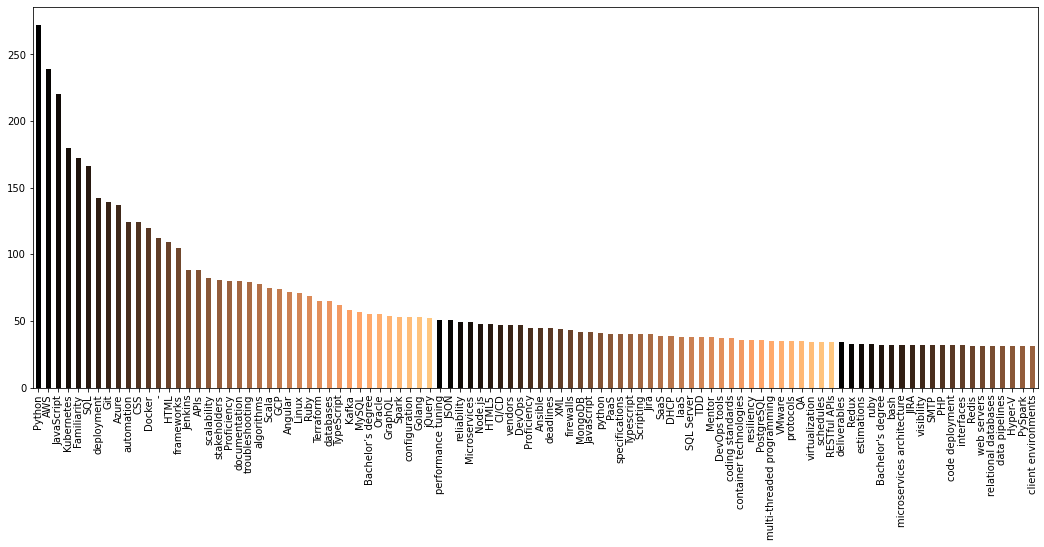

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['RAW DATA'].value_counts().head(100).plot.bar(color = color)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_WordCloud(filter_data):
    comment_words = ' '
    stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
    for val in filter_data: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 
        #print(val) 
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
         comment_words = comment_words + words + ' '
         #print(comment_words)

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',
                    max_words = 200, 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

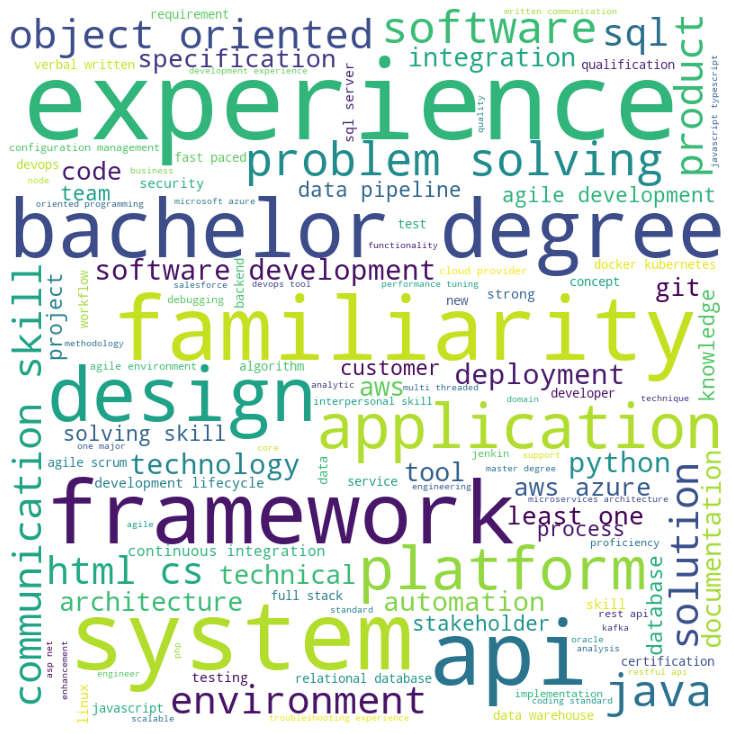

In [ ]:
show_WordCloud(data['RAW DATA'])

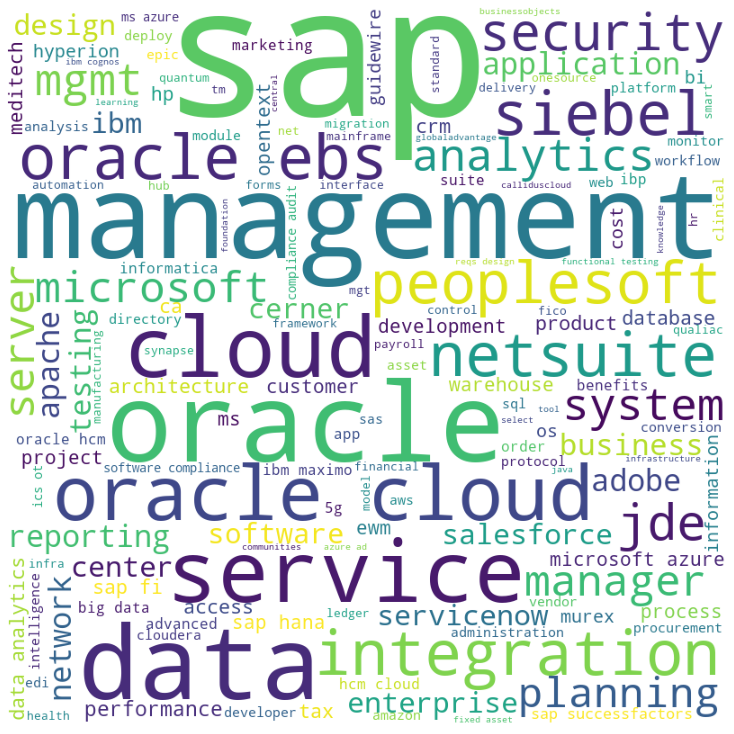

In [ ]:
show_WordCloud(sample['Technology Skills'])

# Pre Processing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

##Creating a list of custom stopwords
new_words = ["modification"]

stop_words = list(stop_words.union(new_words))

def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    # remove stopwords
    text = [word for word in text if word not in stop_words]

    # remove words less than three letters
    text = [word for word in text if len(word) >= 3]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    text = [lmtzr.lemmatize(word) for word in text]
    
    return ' '.join(text)

In [ ]:
data['RAW DATA'] = data['RAW DATA'].map(lambda x: pre_process(x)) # use map function to use the cleanning function

## Remove Noun Pharses words

In [ ]:
import nlp
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_noun_phrases(text):
    """Combine noun phrases. 
    
    Keyword arguments:
    text -- the actual text source from which to extract entities
    
    """
    doc = nlp(text)
    text2 = doc.noun_chunks
    return text2
     


def extract_named_ents(text):
    """Extract named entities, and beginning, middle and end idx using spaCy's out-of-the-box model. 
    
    Keyword arguments:
    text -- the actual text source from which to extract entities
    
    """
    return [(ent.text, ent.start_char, ent.end_char, ent.label_) for ent in nlp(text).ents]

In [ ]:
extract_noun_phrases(data['RAW DATA'][5])

java stream


In [ ]:
data['RAW DATA'] = data['RAW DATA'].map(lambda x: extract_noun_phrases(x)) 

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import MiniBatchKMeans

## get words token from text
def getWordsFromText(_text):
    words = []
    for i in range(0,len(_text)):
        words.append(str(_text.iloc[i]['text_body']).split(" "))
    return words

# Read Excel data as Data Frame
def readExcelToDataFrame(path):
    research_dataframe = pd.read_csv(path,index_col=False)
    research_dataframe.drop(research_dataframe.columns[research_dataframe.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
    return research_dataframe

## basic scatter plot
def showScatterPlot(_X,title):
    # sns settings
    sns.set(rc={'figure.figsize':(15,15)})
    # colors
    palette = sns.color_palette("bright", 1)
    # plot
    sns.scatterplot(_X[:,0], _X[:,1], palette=palette)
    plt.title(title)
    # plt.savefig("plots/t-sne_covid19.png")
    plt.show()

## scatter plot with cluster
def showClusterScatterPlot(_X, _y_pred, title):
    # sns settings
    sns.set(rc={'figure.figsize':(10,10)})
    # colors
    palette = sns.color_palette("bright", len(set(_y_pred)))
    # plot
    sns.scatterplot(_X[:,0], _X[:,1], hue=_y_pred, legend='full', palette=palette)
    plt.title(title)
    # plt.savefig("plots/t-sne_covid19_label.png")
    plt.show()


## drop clumns
def getTargetData(dataFrame):
    text_body = dataFrame.drop(["doc_id", "source", "title", "abstract"], axis=1)
    return getWordsFromText(text_body)

## train model for tSNE clustering visualization
def trainEmbededData(_perplexity,dataFrame,total_cluster, _n_iter):
    ## convert text to word frequency vectors
    vectorizer = TfidfVectorizer(max_features=2**12)
    
    ## training the data and returning term-document matrix.
    _X = vectorizer.fit_transform(dataFrame['RAW DATA'].values)
    
    ## tsne declartion
    tsne = TSNE(verbose=1, perplexity=_perplexity,learning_rate=200, random_state=0, n_iter=_n_iter)
    _X_embeded = tsne.fit_transform(_X.toarray())
    
    ## clusterring for tsne
    _kmeans = MiniBatchKMeans(n_clusters=total_cluster)
    return _X_embeded,_kmeans,_X

## predicting cluster centers and predict cluster index for each sample
def predict(_kmeans,_X):
    return _kmeans.fit_predict(_X)

def analyse(pplexity,data_frame,cluster,iter):
    ## train model for tSNE clustering visualization
    embeded,kmeans,x = trainEmbededData(pplexity,data_frame,cluster,iter)
    pred = predict(kmeans,x)
    ## visualized the scatter plot
    showClusterScatterPlot(embeded,pred,'Keywords')
    return embeded,kmeans,x

In [ ]:
embeded,kmeans,x = analyse(50,data,10,250)

# Classification

## Cosine Similarity 

1.  Vectorize words
2.  Use Simple formula of cosine similarity to classify the words
3.  similarity is between 1 & 0 



In [ ]:
import warnings
warnings.filterwarnings("ignore")                     

import numpy as np                                  
import pandas as pd                                
import nltk                                         
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer                
from sklearn.feature_extraction.text import CountVectorizer          
from sklearn.feature_extraction.text import TfidfVectorizer          
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

def cosine_sim(vec1, vec2):
    '''Return Cosine Similarity.'''
    return  np.dot(vec1,vec2)/(np.linalg.norm(vec1)* np.linalg.norm(vec2))

def ranking(jd_text,data):
    X_list = word_tokenize(data) 
    Y_list = word_tokenize(jd_text)
    print(X_list,Y_list)
    
    # sw contains the list of stopwords
    sw = stopwords.words('english') 
    l1 =[];l2 =[]
    
    # remove stop words from the string
    X_set = {w for w in X_list if not w in sw} 
    Y_set = {w for w in Y_list if not w in sw}
    
    # form a set containing keywords of both strings 
    rvector = X_set.union(Y_set) 
    for w in rvector:
        if w in X_set: l1.append(1) # create a vector
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)
    c = 0
    
    # cosine formula 
    for i in range(len(rvector)):
            c+= l1[i]*l2[i]
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    rank = cosine
    return rank


In [ ]:
allwordsjoined = ' '.join([str(elem) for elem in final])

In [ ]:
ranking(allwordsjoined,"Hi it oracle ESB Apache and others") #similarity is between 1 & 0

['Hi', 'it', 'oracle', 'ESB', 'Apache', 'and', 'others'] ['Oracle', 'ESB', 'Apache', 'Kudu', 'Amazon', 'Elastic', 'MapReduce', '(', 'EMR', ')', 'Oracle', 'EBS', 'Grid', 'Contral', 'Mgt', 'Pack', 'Oracle', 'Cloud', 'Revenue', 'Management', 'SAP', 'MDG', '-', 'UI', 'Dev', '.', 'and', 'Enhancement', 'SAP', 'Cross', 'Application', 'Time', 'Sheets', '(', 'CATS', ')', 'CRM', 'Infra', '(', 'ACD/PBX/Network/Server', ')', 'Misys', 'Loan', 'IQ', 'Testing', 'Mainframe', 'Architectures', 'Microsoft', 'Identity', '&', 'Directory', 'Services', 'McKessonInpatient', 'PhysicalRehabilitation', 'Oracle', 'HCM', 'Cloud', 'Fast', 'Formulas', 'SAP', 'FI', 'Public', 'Sector', 'Management', 'MS', 'SQL', 'Reporting', 'Services', 'Fixed', 'Asset', 'Software', '(', 'FAS', ')', 'PeopleSoft', 'Purchase', 'Order', 'Chrome', 'Developer', 'Tools', 'ServiceNow', 'Financial', 'Management', 'Loadster', 'Interface', 'Development', 'Oracle', 'Data', 'Visualization', '(', 'DVCS', ')', 'Knowledge', 'Based', 'Marketing', '('

0.024406583343411323

## Word2vec - to find similar words of the sample technical skills given


1.   Still Working on it



In [ ]:
sample.sample(10)

,Technology Skills
335,NetSuite Single Sign-On
310,Double Click
47,SAP IS Real Estate (RE)
122,JDE Apparel Management
486,Power Platform
861,Database Testing-Scuba
170,Microsoft .NET Windows Forms
651,Check Point/IPSO
854,Infrastructure Management Process
0,SAP Fiori Developer


In [ ]:
# making a list of words
new = sample.values.tolist() 

final =[]
for i in new:
    final = i + final

In [ ]:
for i in final: # remove-ing blanks
  if i=="":
    final.remove(i)

In [ ]:
import logging  # Setting up the loggings to monitor gensim

In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
phrases = Phrases(final, min_count=30, progress_per=10000) # create pharases with the words 🥲 but as we have keywords its a problem

In [ ]:
bigram = Phraser(phrases)

In [ ]:
sentences = bigram[final]

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

897

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['Azure Synapse Analytics',
 'DEC - Other',
 'Adobe Experience Manager - Communities',
 'SAP Fiori Developer',
 'SAP Consignment',
 'MS Bot Framework',
 'Oracle Cloud Product Hub Data Steward',
 'SAP TM-EWM Integration',
 'MySQL',
 'MS SQL Reporting Services']

In [ ]:
import multiprocessing

from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()

In [ ]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)

In [ ]:
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.0 mins


In [ ]:
w2v_model.wv.most_similar(positive=["DevOps"])

## Spacy



1.   Detect similarity between words using pre trained 'eng' models
2.   'eng_lg' can be used to get better results



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import spacy
nlp = spacy.load('en')

In [ ]:
def detectSimilarity(sample,target):
  words = sample + " " + target
  tokens = nlp(words)

  token1, token2 = tokens[0], tokens[1]

  similarity = token1.similarity(token2)

  return similarity

In [ ]:
detectSimilarity("hi","hello")

0.6237231

### Pre processing

In [ ]:
# making a list of words
data0 = data.values.tolist() 
sample0 = sample.values.tolist() 

given =[]
target =[]

for i in sample0:
    given = i + given

for i in data0:
    target = i + target

In [ ]:
for i in target: # remove-ing blanks
  if i=="":
    target.remove(i)

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# for i in target: 

def remove(target_list):
  for text in target_list:
    word_tokens = word_tokenize(text)

    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

    filtered_sentence = []

    for w in word_tokens:
      if w not in stop_words:
        filtered_sentence.append(w)

    if filtered_sentence: #if list is not empty
      print(filtered_sentence,"List")
    else:
      target_list.remove(text)
    
  return target_list

In [ ]:
final = remove(target) #removes stopwords

Streaming output truncated to the last 5000 lines.
['multi', 'threaded', 'programming'] List
['advanced', 'programming', 'construct'] List
['apis'] List
['graphql'] List
['node'] List
['angular'] List
['terraform'] List
['azure', 'cloud', 'native', 'architecture'] List
['powershell'] List
['proficiency'] List
['observability'] List
['data', 'analytics'] List
['sql'] List
['non', 'technical', 'stakeholder'] List
['strong', 'business', 'acumen'] List
['technical', 'fluency'] List
['complex', 'saas', 'cloud', 'based', 'application'] List
['development', 'initiative'] List
['product', 'roadmap'] List
['mentor'] List
['strategic', 'technical', 'direction'] List
['highly', 'scalable', 'available', 'innovative', 'solution'] List
['workforce', 'management', 'domain'] List
['multiplatform', 'framework'] List
['kotlin'] List
['apple', 'hig'] List
['swift', 'programming', 'expertise'] List
['native', 'io', 'development'] List
['programing'] List
['kotlin', 'kotlin', 'multiplatform'] List
['javasc

In [ ]:
given[0]

'Oracle ESB'

### Testing the similarity function

In [ ]:
for i in given:
  print("word:",i)
  print(detectSimilarity(i,target[0]))

0.43648243
Oracle Modules Functional Testing
0.17709695
Cloud IAM Strategy and Assurance
0.3073165
Microsoft - Azure AD
0.096658744
JDE Manufacturing Management
0.40997764
HCIT Order Entry Functionality
0.44611007
Epic Security
0.37046883
SAP iRPA
0.31292433
Crystal Ball
0.23297141
Open ID Connect
0.2784212
Deloitte Incentives Assistant (DIA)
0.3231933
Smartcomm
0.24590407
SAP - Advanced Compliance Reporting ACR
0.09685591
Flash
0.4055003
Airwatch
0.33354563
NERC CIP
0.44244573
SAP MDG - Workflow Development
0.5544755
Amazon Cloud Architect
0.38855895
Meditech Health Information Management
0.5133622
Oracle Autonomous Data Warehouse (ADW)
0.20264018
SAP CRM C4C Service
0.6923856
SAP SuccessFactors DC Tal Mngmt Learning
0.64970887
Enlighta Incident Management
0.3229171
IBM InfoSphere BigInsights
0.45817465
Murex (Clearing/CCPs) Config & Deploy
-0.025193254
Quantum Chemistry
0.40980706
Nvidia CUDA
0.38834238
CallidusCloud Contract Lifecycle Mgmt.
0.46596283
ABAP (BAPI)
-0.12937802
Oracle 

KeyboardInterrupt: ignored

### Similarity functions


1.   Using one word from the sample words as lack of time and computational power



In [ ]:
output = []

# for i in given:
for k in final:
  rank = detectSimilarity(given[0],k)
  if rank >=0.4:
    output = output + [k]
    final.remove(k) ## removing the non techincal and bad words from the list
    print(given[0],k,"---",rank)

ifs disability --- 0.40114313
ifs accomplishment --- 0.41235292
ifs accomplishment --- 0.41235292
ifs credit risk parameter --- 0.4019425
ifs exploitation --- 0.4065515
ifs bitbucket --- 0.4022349
ifs functionality --- 0.40321285
ifs vulnerability --- 0.409787
ifs security configuration --- 0.4012329
ifs communication protocol --- 0.411978
ifs authentication --- 0.4025133
ifs bug fix --- 0.40588546
ifs authentication --- 0.4025133
ifs usability --- 0.43631005
ifs remediation --- 0.42750654
ifs documentation --- 0.40661564
ifs availability --- 0.40275657
ifs query optimization --- 0.4010565
ifs sdk --- 0.40858704
ifs bitbucket --- 0.4022349
ifs sdk --- 0.40858704
ifs sdk --- 0.40858704
ifs bitbucket --- 0.4022349
ifs bitbucket --- 0.4022349
ifs real time embedded issue --- 0.4025473
ifs functionality --- 0.40321285
ifs specification --- 0.40596196
ifs specification --- 0.40596196
ifs specialization --- 0.41426465
ifs prioritization --- 0.41317567
ifs documentation --- 0.40661564
ifs spe

### Non Technical words

In [ ]:
output = []

for i in given:
  for k in final:
    rank = detectSimilarity(i,k)
    if rank >=0.4:
      output = output + [k]
      print(i,k,"---",rank)

Oracle ESB disability --- 0.40114313
Oracle ESB accomplishment --- 0.41235292
Oracle ESB accomplishment --- 0.41235292
Oracle ESB credit risk parameter --- 0.4019425
Oracle ESB exploitation --- 0.4065515
Oracle ESB bitbucket --- 0.4022349
Oracle ESB functionality --- 0.40321285
Oracle ESB vulnerability --- 0.409787
Oracle ESB security configuration --- 0.4012329
Oracle ESB communication protocol --- 0.411978
Oracle ESB authentication --- 0.4025133
Oracle ESB bug fix --- 0.40588546
Oracle ESB authentication --- 0.4025133
Oracle ESB usability --- 0.43631005
Oracle ESB remediation --- 0.42750654
Oracle ESB documentation --- 0.40661564
Oracle ESB availability --- 0.40275657
Oracle ESB query optimization --- 0.4010565
Oracle ESB sdk --- 0.40858704
Oracle ESB bitbucket --- 0.4022349
Oracle ESB sdk --- 0.40858704
Oracle ESB sdk --- 0.40858704
Oracle ESB bitbucket --- 0.4022349
Oracle ESB bitbucket --- 0.4022349
Oracle ESB real time embedded issue --- 0.4025473
Oracle ESB functionality --- 0.4

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-134-c7037164b540>", line 5, in <module>
    rank = detectSimilarity(i,k)
  File "<ipython-input-104-3e7f6c014fb6>", line 10, in detectSimilarity
    similarity = token1.similarity(token2)
  File "token.pyx", line 214, in spacy.tokens.token.Token.similarity
  File "/usr/local/lib/python3.7/dist-packages/spacy/errors.py", line 630, in models_warning
    _warn(message, "models")
  File "/usr/local/lib/python3.7/dist-packages/spacy/errors.py", line 645, in _warn
    stack = inspect.stack()[-1]
  File "/usr/lib/python3.7/inspect.py", line 1513, in stack
    return getouterframes(sys._getframe(1), context)
  File "/usr/lib/python3.7/inspect.py", line 1490, in getouterframes
    frameinfo = (frame,) + getframeinfo(frame, context)
  File "/usr/lib/python3.7/inspect.py", line 1464,

KeyboardInterrupt: ignored

# 1323 words were removed 



1.   Only 1 comparision removed 1323 words ! all comparisons can remove almost all
2.   why not now! No time Cause exams 🥲 and lack of compuatational power



### Length of the data after remove all no technical words

In [ ]:
len(final) #34116

32793

In [ ]:
final

['deadline',
 'negotiation',
 'self motivated enthusiastic strong drive',
 'deadline',
 'negotiation',
 'self motivated enthusiastic strong drive',
 'applicant',
 'actalent',
 'limited supervision',
 'leadership quality',
 'telecom product',
 'cmis',
 'embedded software',
 'underlying transceiver code software',
 'notably register map',
 'cmis',
 'related documentation',
 'cmis',
 'agile continuous integration',
 'bitbucket git',
 'php',
 'node',
 'server side scripting skill',
 'swift objective',
 'kotlin java',
 'beneficial html',
 'tech stack',
 'brightscript scenegraph',
 'roku application',
 'roku application development',
 'recruitment selection process',
 'accommodation',
 'background',
 'statflo',
 'strong troubleshooting problem solving skill',
 'humour',
 'boundless positivity',
 'high velocity',
 'result oriented data driven experimental attitude',
 'github use',
 'familiarity',
 'functional programming',
 'javascript',
 'messaging queuing service',
 'nosql store',
 'relatio